In [1]:
import numpy as np
from assortativity import measures as m
from assortativity import tools
import networkx as nx
import bct

import matplotlib.pyplot as plt
%matplotlib inline

## Random Networks

An Erdos-Renyi random networks with probability of connection of 0.0618625, and 400 nodes

In [2]:
#Generate the random network
A = nx.to_numpy_array(nx.generators.random_graphs.erdos_renyi_graph(400, 0.02))

In [3]:
#Compute local assortativity (Degree)
la_er_deg,_ = m.localAssort(A, np.sum(A, axis=0))

Text(0, 0.5, 'Node Degree')

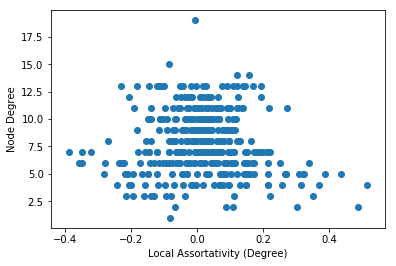

In [6]:
#plot results
deg_er = np.sum(A, axis=0)

plt.figure()
plt.scatter(la_er_deg, deg_er)
plt.xlabel("Local Assortativity (Degree)")
plt.ylabel("Node Degree")

## Brain Structural Connectome

Consensus structural connectome generated from data made available by the Human Connectome Project. The connectome uses the Schaeffer Parcellation (Schaeffer, 2018), with 400 nodes.

In [7]:
#Load the "Structural Connectome" from data folder, and convert to binary
SC = np.load("data/SC.npy")
SC[SC>0] = 1

#Load T1wT2w information available for this connectome
T1wT2w = np.load("data/T1wT2w.npy")

#Compute Global Assortativity
ga_deg = m.globalAssort(SC, np.sum(SC, axis=0))  #Degree Attribute
ga_mye = m.globalAssort(SC, T1wT2w)              #T1w/T2w Attribute

#Compute Local Assortativity (Using pagerank, with probability of restart of 0.99)
la_deg,w = m.localAssort(SC, np.sum(SC, axis=0), pr=0.99)  #Degree Attribute
la_mye,_ = m.localAssort(SC, T1wT2w, pr=0.99)              #T1w/T2w Attribute

#Print results
print("Degree Global Assortativity: "+str(ga_deg))
print("T1wT2w Global Assortativity: "+str(ga_mye))

Degree Global Assortativity: 0.14490312279638912
T1wT2w Global Assortativity: 0.3590191249643664
